In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 


In [4]:
df = pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#Drop unnamed:0 column
df = df.drop(["Unnamed: 0"],axis=1)

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### **EDA**

In [7]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
#Correlation
print(df.corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


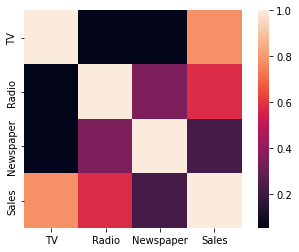

In [10]:
sns.heatmap(df.corr(), square=True)

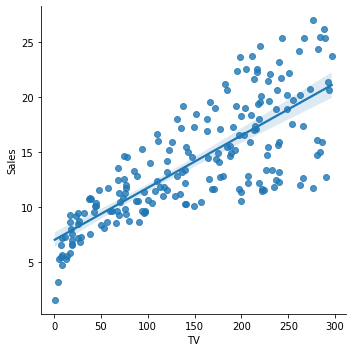

In [11]:
sns.lmplot(x='TV', y='Sales', data=df)

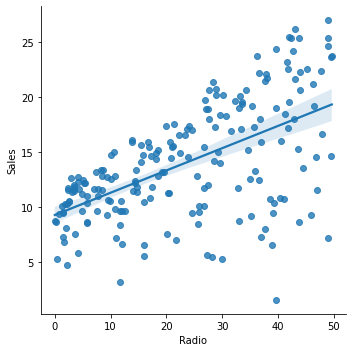

In [12]:
sns.lmplot(x='Radio', y='Sales', data=df)

#### **Model for TV price prediction (tv sales)**

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import *

In [14]:
X = df[['TV']]
y = df.Sales

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [20]:
#Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
model1.score(X_test, y_test)

0.6467764114598504

In [21]:
#GradientBoostingRegression
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor(random_state=0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
model2.score(X_test, y_test)

0.576507375867209

In [22]:
#GaussianRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
model3 = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
model3.score(X_test, y_test)

0.6470479928879316

In [26]:
#Bayesian ARD Regression
from sklearn import linear_model
model4 = linear_model.ARDRegression()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
model4.score(X_test, y_test)

0.646219619327637

In [27]:
#Bayesian Ridge Regression
from sklearn import linear_model
model5 = linear_model.BayesianRidge()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
model5.score(X_test, y_test)

0.646219619327637

In [30]:
#KNN based Regression
from sklearn.neighbors import KNeighborsRegressor
model6 = KNeighborsRegressor(n_neighbors=2)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
model6.score(X_test, y_test)

0.5416110476099127

In [31]:
#MLP based regressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
model7 = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
model7.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6444395604657065

#### **Gaussian Regressor performed better than others**